In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [2]:
data = pd.read_excel("Company_x.xlsx", engine='openpyxl')

In [3]:
data

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,ClosureReason,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,932,Creditor 1,3677,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,NaN,NaN,NaN,NaN
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,NaN,N,NaN,NaN,N,NaN,NaN,1.0,NaN,0,0,1,NaN,NaN,NaN,NaN
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,N,5.37,Cheque,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
3,160,Creditor 2,9859,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,Y,NaN,N,NaN,NaN,N,NaN,NaN,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,NaN,N,NaN,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,99901565,Creditor 50,990495842,448.20,448.20,448.20,7.38,Finance Company - Other,ACTIVE,N,NaN,N,NaN,NaN,N,NaN,NaN,1.0,36.0,1,1,1,NaN,NaN,NaN,NaN
406419,99901565,Creditor 50,990495843,1678.37,1678.37,1678.37,7.38,Finance Company - Other,ACTIVE,N,NaN,N,NaN,NaN,N,NaN,NaN,1.0,37.0,0,1,1,NaN,NaN,NaN,NaN
406420,99901565,Creditor 50,990495844,3512.60,3512.60,3512.60,7.38,Finance Company - Other,ACTIVE,N,NaN,N,NaN,NaN,N,NaN,NaN,1.0,71.0,1,1,1,NaN,NaN,NaN,NaN
406421,99901565,Creditor 50,990495845,4477.31,4477.31,4477.31,7.38,Finance Company - Other,ACTIVE,N,NaN,N,NaN,NaN,N,NaN,NaN,1.0,38.0,1,1,1,NaN,NaN,NaN,NaN


In [4]:
data.shape

(406423, 26)

In [5]:
data.describe()

,EntityID,AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,LastPaymentAmount,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,4.064230e+05,4.064230e+05,406423.000000,406423.000000,406423.000000,403731.000000,103977.000000,406301.000000,376941.000000,406423.000000,406423.000000,406423.000000,0.0,0.0,0.0,1.0
mean,3.970443e+07,3.954380e+08,1301.866266,1539.010928,1600.933847,5.618606,283.896947,1.017145,45.728061,0.435652,0.208113,0.847354,NaN,NaN,NaN,960.0
std,4.698070e+07,4.654769e+08,4030.513710,4416.229311,4531.889319,5.441934,1119.842219,0.132866,12.950395,0.714852,0.434321,0.459690,NaN,NaN,NaN,NaN
min,1.600000e+02,3.677000e+03,-7717.200000,0.000000,0.000000,0.190000,0.010000,1.000000,-41.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,960.0
25%,3.010600e+06,3.023088e+07,85.330000,246.970000,249.875000,3.070000,20.000000,1.000000,36.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,960.0
50%,3.010949e+06,3.045075e+07,457.510000,619.000000,630.740000,4.220000,40.000000,1.000000,44.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,960.0
75%,9.990131e+07,9.901891e+08,1159.365000,1393.780000,1433.755000,6.590000,142.900000,1.000000,54.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,960.0
max,9.990159e+07,9.904958e+08,441681.520000,844343.000000,844343.000000,52.180000,73131.840000,4.000000,133.000000,8.000000,5.000000,7.000000,NaN,NaN,NaN,960.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   BalanceAtDebtLoad           406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   IsStatBarred                406423 non-null  object 
 10  ClosureReason               9030 non-null    object 
 11  InBankruptcy                406423 non-null  object 
 12  AccountInsolvencyType       285 non-null     object 
 13  CustomerInsolv

# Dropping unwanted columns and columns with more missing values:-

In [7]:
data.isnull().sum()

EntityID                           0
OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
BalanceAtDebtLoad                  0
PurchasePrice                   2692
ProductOrDebtType                  0
CollectionStatus                   0
IsStatBarred                       0
ClosureReason                 397393
InBankruptcy                       0
AccountInsolvencyType         406138
CustomerInsolvencyType        397892
IsLegal                            0
LastPaymentAmount             302446
LastPaymentMethod             302446
NumLiableParties                 122
CustomerAge                    29482
NumPhones                          0
NumEmails                          0
NumAddresses                       0
Unnamed: 22                   406423
Unnamed: 23                   406423
Unnamed: 24                   406423
Unnamed: 25                   406422
dtype: int64

In [8]:
df = data.copy()

In [9]:
df.columns

Index(['EntityID', 'OriginalCreditor[Redacted]', 'AccountID', 'CurrentBalance',
       'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice',
       'ProductOrDebtType', 'CollectionStatus', 'IsStatBarred',
       'ClosureReason', 'InBankruptcy', 'AccountInsolvencyType',
       'CustomerInsolvencyType', 'IsLegal', 'LastPaymentAmount',
       'LastPaymentMethod', 'NumLiableParties', 'CustomerAge', 'NumPhones',
       'NumEmails', 'NumAddresses', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [10]:
df.drop(columns = ['Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'ClosureReason', 'AccountInsolvencyType', 'CustomerInsolvencyType', 'NumPhones', 'NumEmails', 'NumAddresses', 'EntityID', "DebtLoadPrincipal"], inplace = True)

In [11]:
df

,OriginalCreditor[Redacted],AccountID,CurrentBalance,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge
0,Creditor 1,3677,0.00,1160.20,4.22,Other,PAID_IN_FULL,N,N,Y,10.00,Cheque,1.0,53.0
1,Creditor 2,4276,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,N,N,NaN,NaN,1.0,NaN
2,Creditor 1,8525,0.00,538.57,4.22,Other,PAID_IN_FULL,N,N,N,5.37,Cheque,1.0,NaN
3,Creditor 2,9859,8279.50,8279.50,4.22,Other,PASSIVE,Y,N,N,NaN,NaN,1.0,NaN
4,Creditor 1,12807,0.00,523.00,4.22,Other,PAID_IN_FULL,Y,N,Y,5.00,Cheque,1.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,Creditor 50,990495842,448.20,448.20,7.38,Finance Company - Other,ACTIVE,N,N,N,NaN,NaN,1.0,36.0
406419,Creditor 50,990495843,1678.37,1678.37,7.38,Finance Company - Other,ACTIVE,N,N,N,NaN,NaN,1.0,37.0
406420,Creditor 50,990495844,3512.60,3512.60,7.38,Finance Company - Other,ACTIVE,N,N,N,NaN,NaN,1.0,71.0
406421,Creditor 50,990495845,4477.31,4477.31,7.38,Finance Company - Other,ACTIVE,N,N,N,NaN,NaN,1.0,38.0


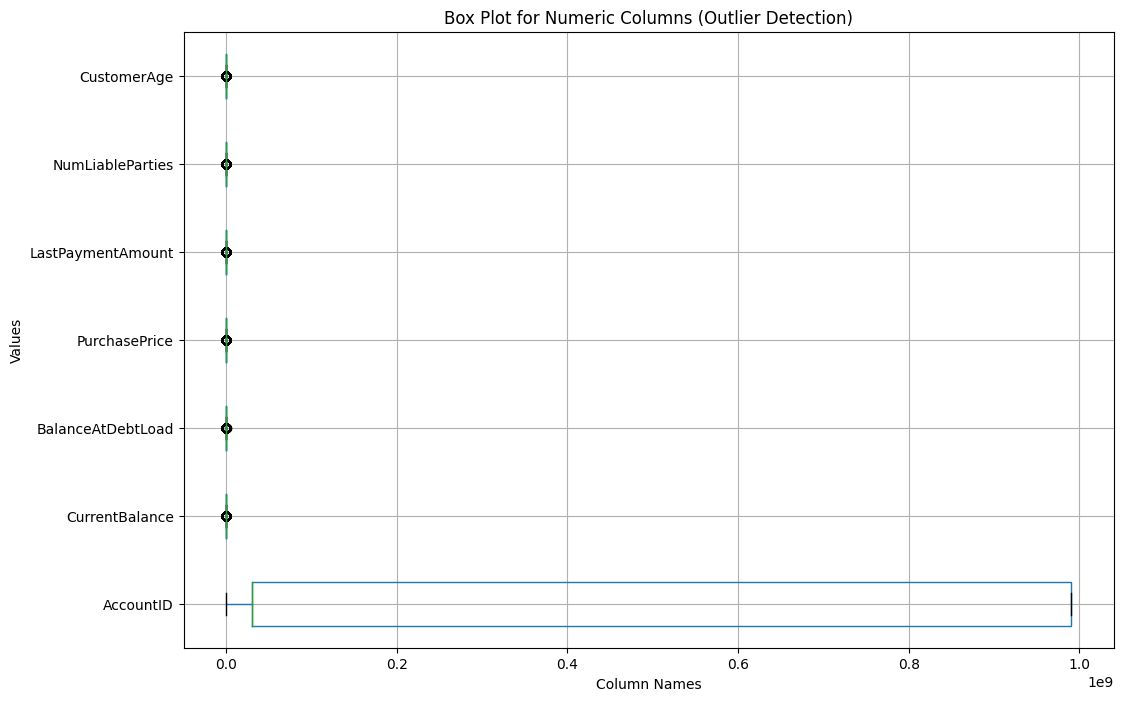

In [12]:
# Select the numeric columns
numeric_columns = ['AccountID', 'CurrentBalance', 
                   'BalanceAtDebtLoad', 'PurchasePrice', 'LastPaymentAmount', 
                   'NumLiableParties', 'CustomerAge']

# Create box plots for each numeric column
plt.figure(figsize=(12, 8))
df[numeric_columns].boxplot(vert=False)
plt.title("Box Plot for Numeric Columns (Outlier Detection)")
plt.xlabel("Column Names")
plt.ylabel("Values")
plt.show()

In [13]:
 for column in df:
     print(f'Column name: {column}')
     print(df[column].value_counts())
     print('\n')
    

Column name: OriginalCreditor[Redacted]
Creditor 17    84768
Creditor 33    55326
Creditor 47    54895
Creditor 48    24862
Creditor 7     22102
Creditor 19    20454
Creditor 10    18937
Creditor 44    17242
Creditor 25    16663
Creditor 42    15934
Creditor 35    14480
Creditor 50    13240
Creditor 43     7441
Creditor 8      6548
Creditor 49     5682
Creditor 36     3787
Creditor 41     2763
Creditor 52     2367
Creditor 40     2281
Creditor 9      2007
Creditor 30     1460
Creditor 6      1333
Creditor 34     1327
Creditor 45     1263
Creditor 31     1169
Creditor 39      927
Creditor 51      874
Creditor 23      863
Creditor 32      860
Creditor 46      785
Creditor 18      770
Creditor 29      662
Creditor 38      633
Creditor 21      483
Creditor 28      273
Creditor 3       173
Creditor 24      159
Creditor 20      156
Creditor 37      106
Creditor 11       83
Creditor 12       82
Creditor 13       78
Creditor 27       59
Creditor 14       30
Creditor 4        13
Creditor 1     

# Handling missing values for both numeric and categorical columns:-

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  object 
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   BalanceAtDebtLoad           406423 non-null  float64
 4   PurchasePrice               403731 non-null  float64
 5   ProductOrDebtType           406423 non-null  object 
 6   CollectionStatus            406423 non-null  object 
 7   IsStatBarred                406423 non-null  object 
 8   InBankruptcy                406423 non-null  object 
 9   IsLegal                     406423 non-null  object 
 10  LastPaymentAmount           103977 non-null  float64
 11  LastPaymentMethod           103977 non-null  object 
 12  NumLiableParties            406301 non-null  float64
 13  CustomerAge   

In [15]:
df.isnull().sum()

OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
BalanceAtDebtLoad                  0
PurchasePrice                   2692
ProductOrDebtType                  0
CollectionStatus                   0
IsStatBarred                       0
InBankruptcy                       0
IsLegal                            0
LastPaymentAmount             302446
LastPaymentMethod             302446
NumLiableParties                 122
CustomerAge                    29482
dtype: int64

In [16]:
categorical_columns = [
    'OriginalCreditor[Redacted]',
    'ProductOrDebtType',
    'CollectionStatus',
    'IsStatBarred',
    'InBankruptcy',
    'IsLegal',
    'LastPaymentMethod'
]

In [17]:
df[categorical_columns].isnull().sum()

OriginalCreditor[Redacted]         0
ProductOrDebtType                  0
CollectionStatus                   0
IsStatBarred                       0
InBankruptcy                       0
IsLegal                            0
LastPaymentMethod             302446
dtype: int64

In [18]:
df.isnull().sum()

OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
BalanceAtDebtLoad                  0
PurchasePrice                   2692
ProductOrDebtType                  0
CollectionStatus                   0
IsStatBarred                       0
InBankruptcy                       0
IsLegal                            0
LastPaymentAmount             302446
LastPaymentMethod             302446
NumLiableParties                 122
CustomerAge                    29482
dtype: int64

In [19]:
def preprocess_data(df):
    # Handle errors and missing values in 'CustomerAge' column
    df['CustomerAge'] = df['CustomerAge'].apply(lambda x: np.nan if x < 18 or x > 100 else x)
    df['CustomerAge'] = df['CustomerAge'].fillna(df['CustomerAge'].median())
    df['CustomerAge'] = df['CustomerAge'].apply(lambda x: round(x)).astype(int)

    # Handle missing values in numeric columns
    df['PurchasePrice'].fillna(df['PurchasePrice'].mean(), inplace=True)
    df['LastPaymentAmount'].fillna(0, inplace=True)  
    df['NumLiableParties'].fillna(df['NumLiableParties'].mode()[0], inplace=True)  

    # Handle missing values in 'LastPaymentMethod' column
    df['LastPaymentMethod'].fillna('Unknown', inplace=True)  
    
    # Perform encoding
    # Label encoding for binary column 'IsStatBarred'
    encoder = LabelEncoder()
    df['IsStatBarred'] = encoder.fit_transform(df['IsStatBarred'])
    
    # Binary encoding for high cardinality columns
    encoder = ce.BinaryEncoder(cols=['OriginalCreditor[Redacted]', 'LastPaymentMethod'])
    df_encoded = encoder.fit_transform(df)

    # One-hot encoding for categorical columns
    categorical_cols = ['ProductOrDebtType', 'CollectionStatus', 'InBankruptcy', 'IsLegal']
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols)

    return df_encoded

In [20]:
df1 = preprocess_data(df)

In [21]:
df1.head(20)

,OriginalCreditor[Redacted]_0,OriginalCreditor[Redacted]_1,OriginalCreditor[Redacted]_2,OriginalCreditor[Redacted]_3,OriginalCreditor[Redacted]_4,OriginalCreditor[Redacted]_5,AccountID,CurrentBalance,BalanceAtDebtLoad,PurchasePrice,IsStatBarred,LastPaymentAmount,LastPaymentMethod_0,LastPaymentMethod_1,LastPaymentMethod_2,LastPaymentMethod_3,NumLiableParties,CustomerAge,ProductOrDebtType_Bank - Other,ProductOrDebtType_Credit Cards,ProductOrDebtType_Finance Company - Other,ProductOrDebtType_Hire Purchase,ProductOrDebtType_Loans,ProductOrDebtType_Other,ProductOrDebtType_Personal Loans,ProductOrDebtType_Residential Electricity,ProductOrDebtType_Store Cards,ProductOrDebtType_Utilities/Telco - Other,CollectionStatus_ACTIVE,CollectionStatus_CANCELLED_WITHDRAWN,CollectionStatus_CLOSED,CollectionStatus_HOLDING,CollectionStatus_LEGAL,CollectionStatus_LEGAL_ARRANGEMENT,CollectionStatus_NON_COLLECTION,CollectionStatus_PAID_IN_FULL,CollectionStatus_PASSIVE,CollectionStatus_PENDING,CollectionStatus_SETTLED FOR LESS,CollectionStatus_UNDER_ARRANGEMENT,InBankruptcy_N,InBankruptcy_Y,IsLegal_N,IsLegal_Y
0,0,0,0,0,0,1,3677,0.00,1160.20,4.22,0,10.00,0,0,0,1,1.0,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,4276,182.90,182.90,4.22,1,0.00,0,0,1,0,1.0,44,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,1,8525,0.00,538.57,4.22,0,5.37,0,0,0,1,1.0,44,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,1,0,9859,8279.50,8279.50,4.22,1,0.00,0,0,1,0,1.0,44,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,0,0,0,0,0,1,12807,0.00,523.00,4.22,1,5.00,0,0,0,1,1.0,46,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5,0,0,0,0,0,1,13465,1118.74,790.30,4.22,1,10.00,0,0,0,1,1.0,44,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
6,0,0,0,0,0,1,18664,0.00,71.89,4.22,0,91.27,0,0,0,1,1.0,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
7,0,0,0,0,1,0,18816,0.00,11091.35,4.22,0,1200.00,0,0,0,1,1.0,44,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
8,0,0,0,0,0,1,21091,481.34,404.67,4.22,1,20.00,0,0,0,1,1.0,44,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
9,0,0,0,0,0,1,24413,0.00,903.76,4.22,0,8.26,0,0,0,1,1.0,46,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


# #Checking for weak features & dropping them (Do it if needed):-

In [22]:
correlations = df1.corr()["IsStatBarred"].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.3  * len(df1.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df1.drop(cols_to_drop, axis = 1)

# Correlation heatmap :-

<Axes: >

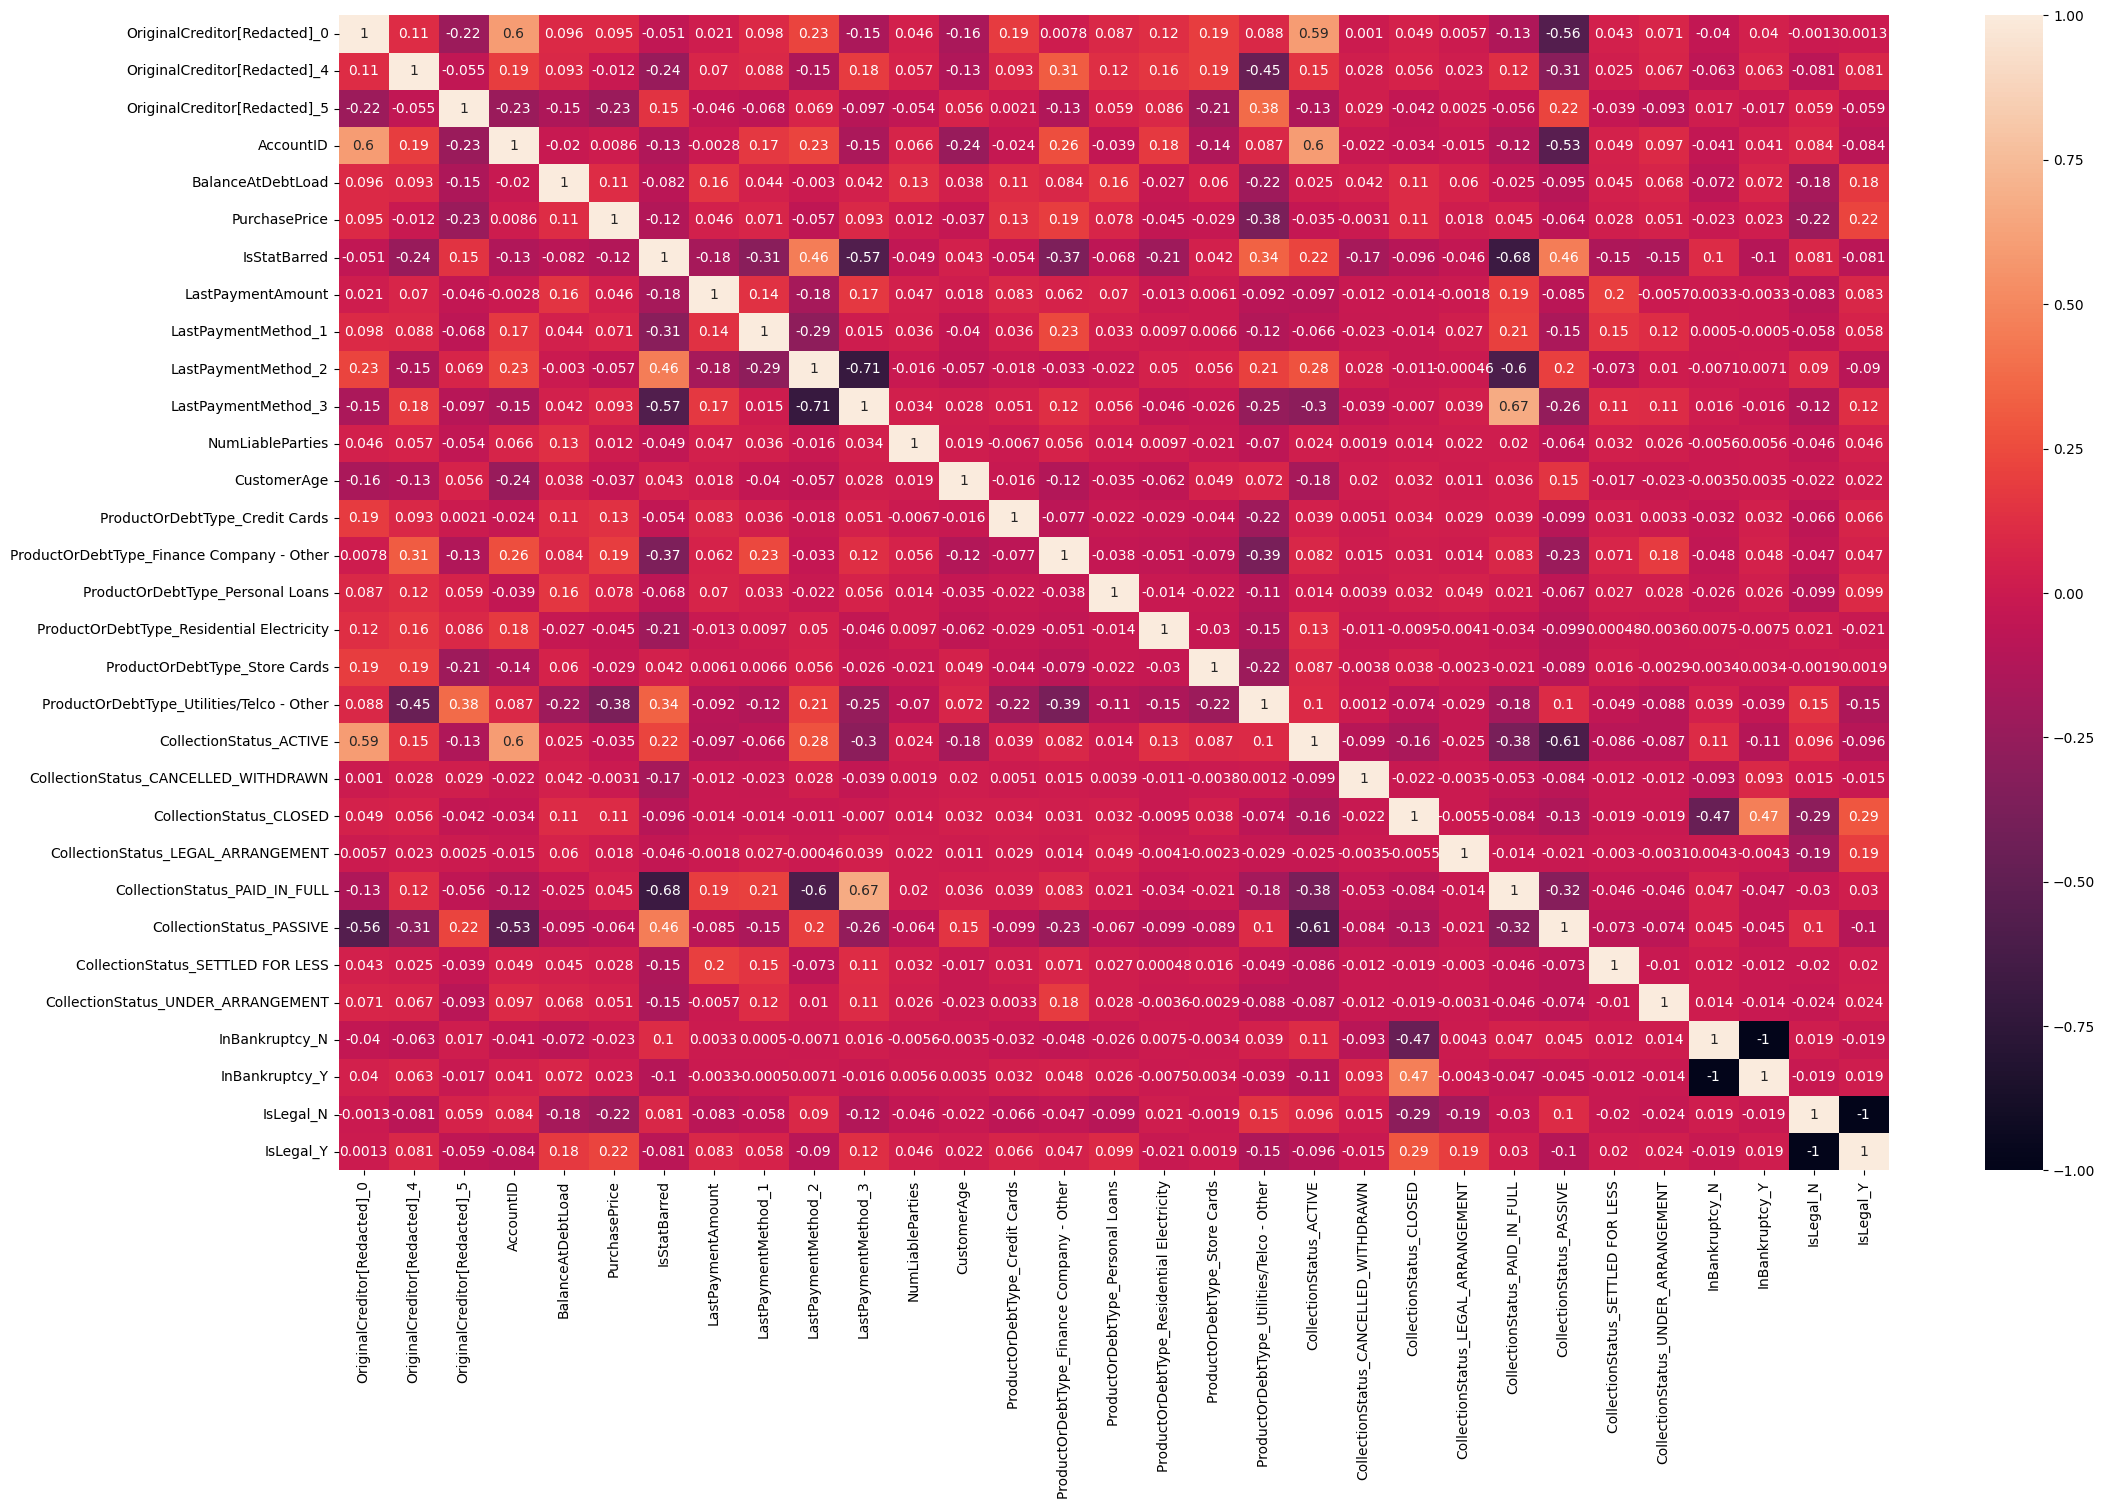

In [23]:
plt.figure(figsize = (25, 15))
sns.heatmap(df_dropped.corr(), annot = True)

# Renaming feature names :-

In [24]:
clean_feature_names = [col.replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in df_dropped.columns]
df_dropped.columns = clean_feature_names
clean_features = df_dropped[clean_feature_names]

# Model training:-

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

In [26]:
x = clean_features.drop(["IsStatBarred"],axis=1)
y = clean_features["IsStatBarred"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100, stratify = y)

In [28]:
x_train.shape

(325138, 30)

# Random forest :-

In [29]:
rf = RandomForestClassifier(random_state = 42)

In [30]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
rf_predictions = rf.predict(x_test)

# XG boost :-

In [32]:
xg = XGBClassifier()

In [33]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
xg_predictions = xg.predict(x_test)

# Model evaluation :-

## Random forest scores :-

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_predictions)

# Accuracy
accuracy = accuracy_score(y_test, rf_predictions)

# Precision
precision = precision_score(y_test, rf_predictions)

# Recall
recall = recall_score(y_test, rf_predictions)

# F1-Score
f1 = f1_score(y_test, rf_predictions)

# ROC AUC
roc_auc = roc_auc_score(y_test, rf_predictions)  # For binary classification, y_pred can be probabilities

# Log Loss
# Assuming y_pred is probabilities
logloss = log_loss(y_test, rf_predictions)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("Log Loss:", logloss)

Confusion Matrix:
[[23772   603]
 [  692 56218]]
Accuracy: 0.9840684013040536
Precision: 0.9893877263687721
Recall: 0.9878404498330697
F1-Score: 0.9886134826916144
ROC AUC: 0.9815509941473042
Log Loss: 0.5742330213312017


## XG Boost scores :-

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, xg_predictions)

# Accuracy
accuracy = accuracy_score(y_test, xg_predictions)

# Precision
precision = precision_score(y_test, xg_predictions)

# Recall
recall = recall_score(y_test, xg_predictions)

# F1-Score
f1 = f1_score(y_test, xg_predictions)

# ROC AUC
roc_auc = roc_auc_score(y_test, xg_predictions)  # For binary classification, y_pred can be probabilities

# Log Loss
# Assuming y_pred is probabilities
logloss = log_loss(y_test, xg_predictions)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("Log Loss:", logloss)

Confusion Matrix:
[[23758   617]
 [  688 56222]]
Accuracy: 0.9839453773758996
Precision: 0.9891447773535776
Recall: 0.9879107362502196
F1-Score: 0.9885273716692016
ROC AUC: 0.9812989578686996
Log Loss: 0.578667253156153


In [37]:
list = [1, 2, 3, 4, 5, 6, 7, 8]
for i in list:
    zip(i[0], i[1])
print(i)

TypeError: 'int' object is not subscriptable

In [38]:
string = "Learnbay"

reversed = string[::-1]

In [39]:
reversed

'yabnraeL'

In [45]:
for i in string[::-1]:
    print(''.join(i))

y
a
b
n
r
a
e
L


'y'